In [8]:
import os
import pandas as pd

In [2]:
pwd

'/Users/macbook/Desktop/MLOPS_Titanic_Project/research'

In [3]:
os.chdir("../")

In [4]:
pwd

'/Users/macbook/Desktop/MLOPS_Titanic_Project'

In [221]:
DATA_PATH = "data/titanic.csv"
titanic = pd.read_csv(DATA_PATH)

In [222]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [223]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [224]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [225]:
#Cabin column has more null values so it can be dropped

titanic.drop(columns = ["Cabin"], inplace= True)

In [226]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [227]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [228]:
#also drop PassengerId, Name, Ticket columns which are that required for Data Cleaning

titanic.drop(columns= ["PassengerId", "Name", "Ticket"], inplace= True)

In [229]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [230]:
#Embarked column has null values which is object

titanic['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [231]:
titanic["Embarked"].fillna("S", inplace=True)   #here 'S' category has larger number of integer values, so using it we are filling the nan values 

In [232]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [233]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [234]:
#Fare column  mean is 32.20 dollars where tickets sold more at this price
titanic["Fare"].mean()

32.204207968574636

In [235]:
#Age column has null values which is int/float using mean 
age_mean = titanic["Age"].mean()


In [236]:
age_mean   #the mean values is 29.69 where the majorty of age group is around 29-30

29.69911764705882

In [237]:
titanic["Age"].fillna(age_mean,inplace=True)

In [238]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# EDA Exploratory Data Analysis

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>],
       [<Axes: title={'center': 'Parch'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

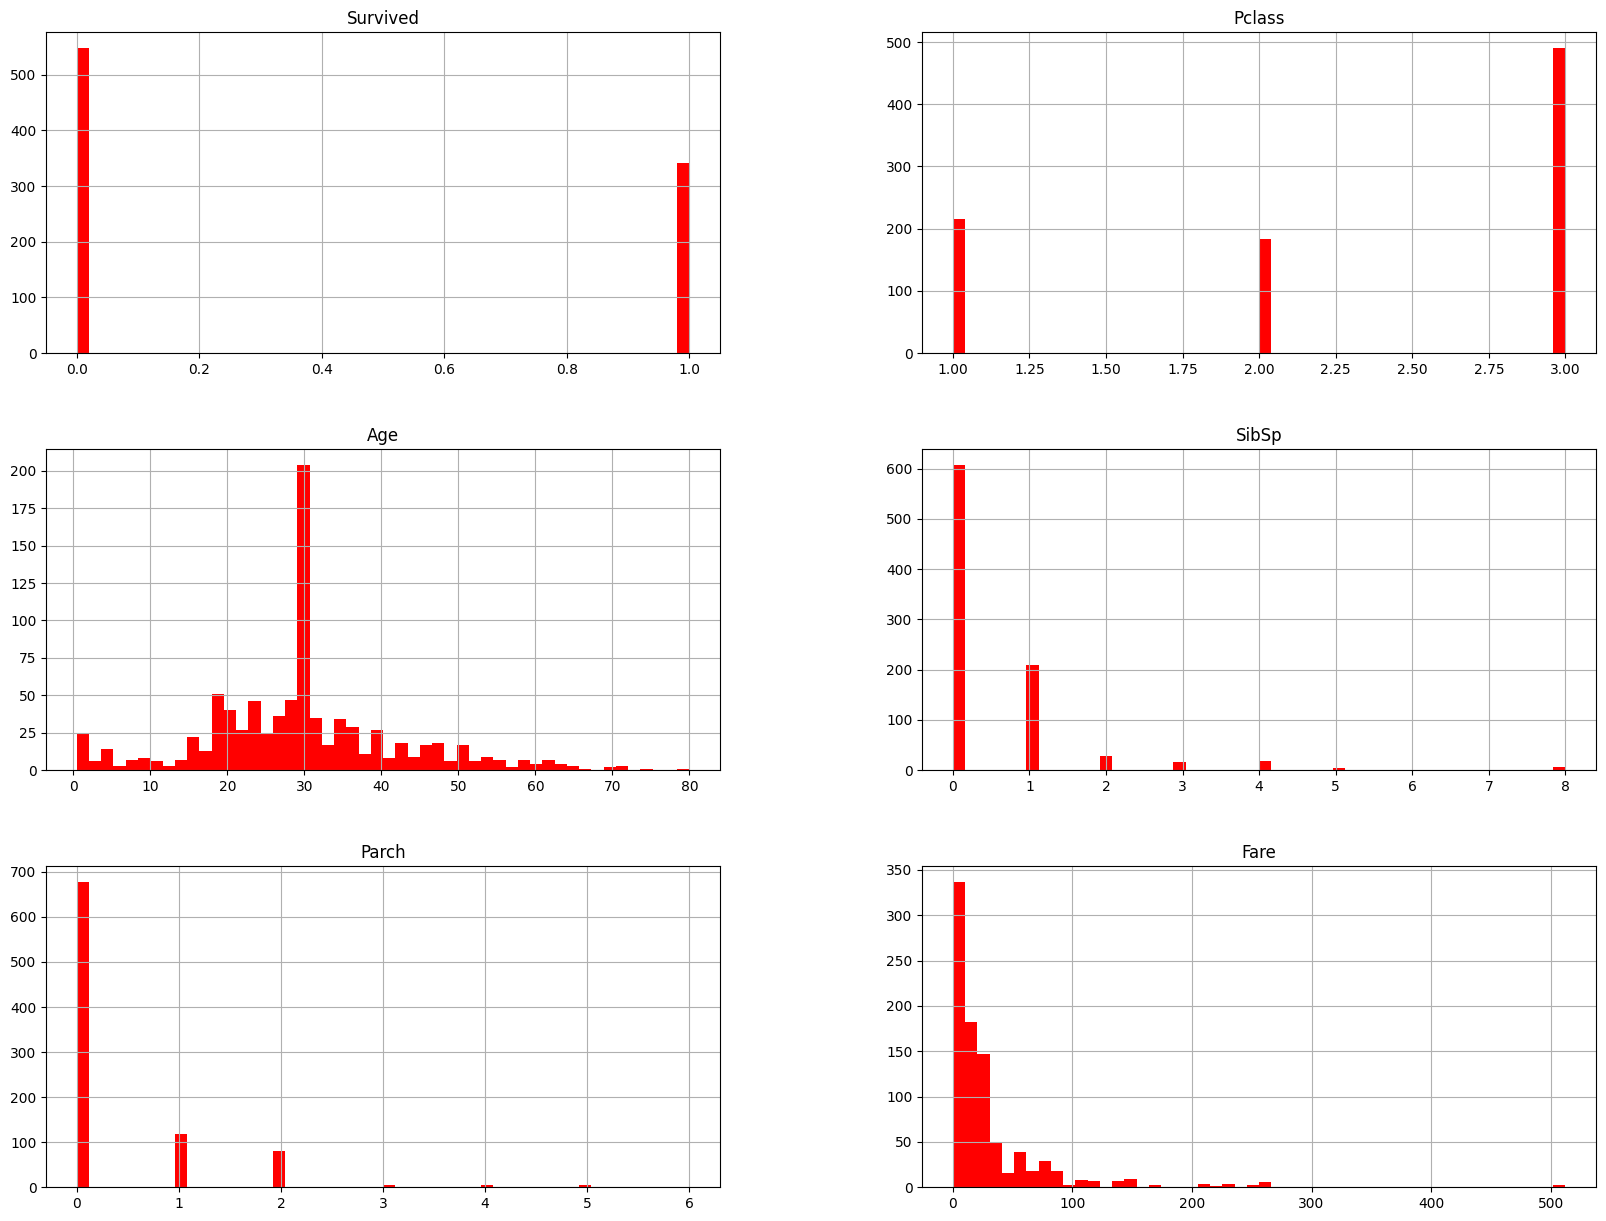

In [239]:
import matplotlib.pyplot as plt

titanic.hist(bins=50, figsize=(20,15), color="red")

In [240]:
import seaborn as sns

In [241]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Univariate Analysis taking only one column i.e on category column:

<Axes: xlabel='Survived', ylabel='count'>

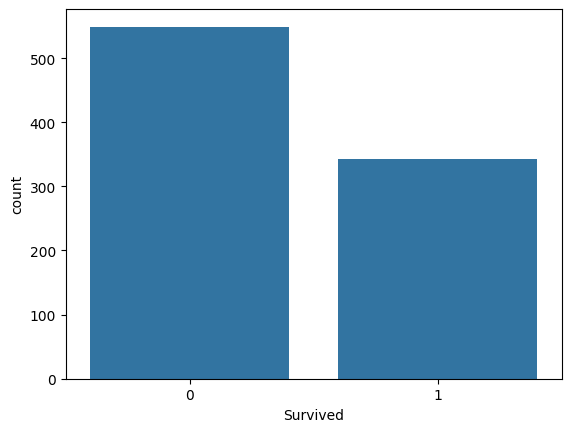

In [242]:
sns.countplot(titanic, x='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

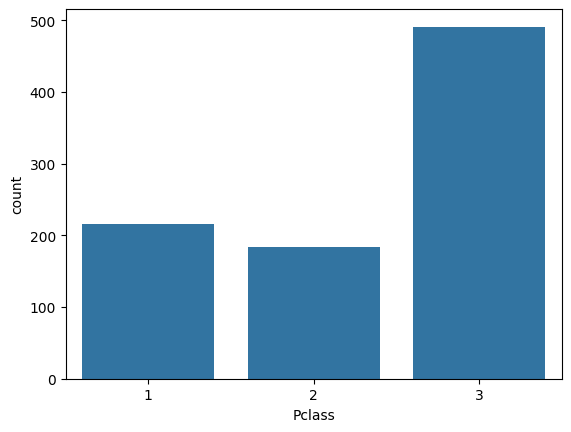

In [243]:
sns.countplot(titanic, x = 'Pclass')

<Axes: xlabel='Sex', ylabel='count'>

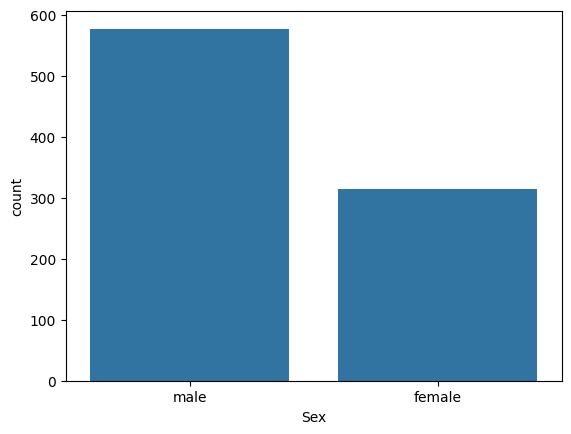

In [244]:
sns.countplot(titanic, x = 'Sex')

<Axes: xlabel='Embarked', ylabel='count'>

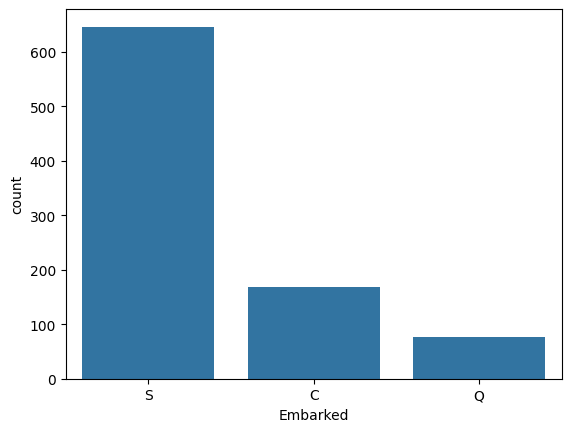

In [245]:
sns.countplot(titanic, x = 'Embarked')

# Bivariate Analysis taking two column i.e on category column


In [246]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

<Axes: xlabel='Survived', ylabel='count'>

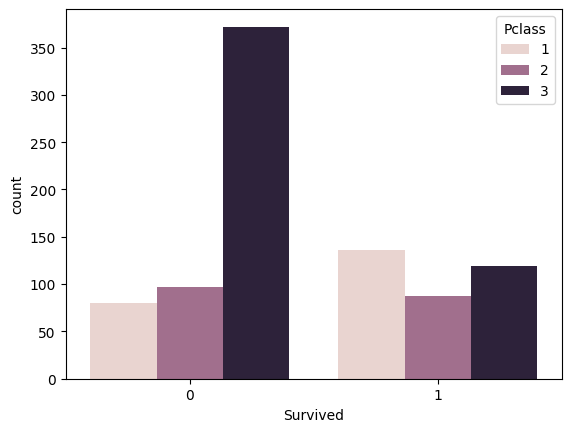

In [247]:
sns.countplot(titanic, x='Survived', hue='Pclass')

<Axes: xlabel='Survived', ylabel='count'>

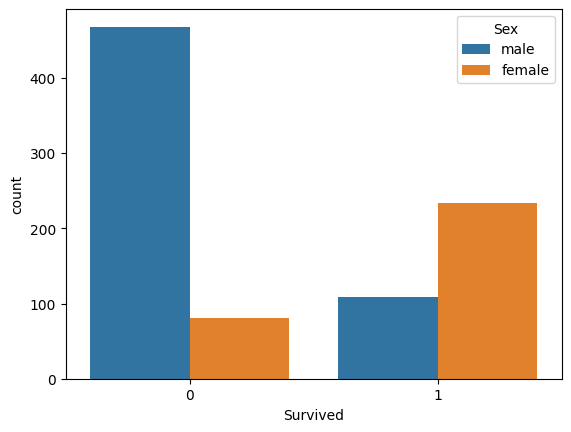

In [248]:
sns.countplot(titanic, x='Survived', hue='Sex')

<Axes: xlabel='Survived', ylabel='count'>

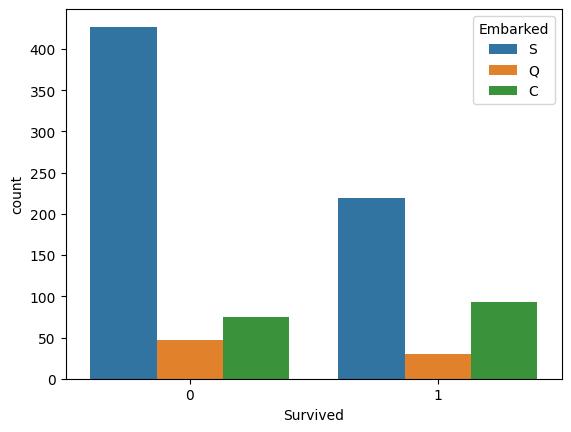

In [249]:
sns.countplot(titanic, x='Survived', hue='Embarked')

# Plotting graph for Numerical column


/var/folders/dp/w9766y9x00j7vmxb8b37p1bc0000gp/T/ipykernel_4669/2607546218.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic["Age"]) #average age is around 29-30 age people where more in the titanic ship, where Age is continuous


<Axes: xlabel='Age', ylabel='Density'>

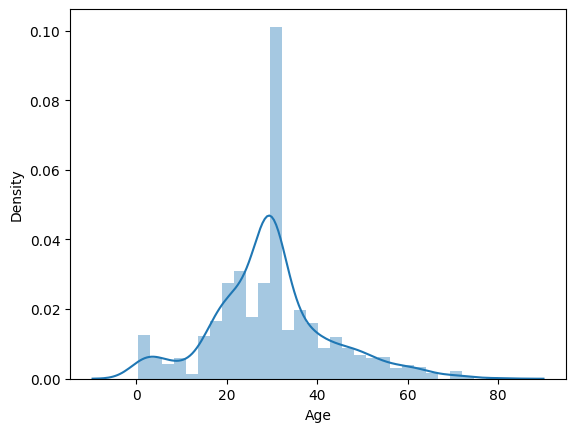

In [250]:
sns.distplot(titanic["Age"]) #average age is around 29-30 age people where more in the titanic ship, where Age is continuous


/var/folders/dp/w9766y9x00j7vmxb8b37p1bc0000gp/T/ipykernel_4669/1521585665.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(titanic["Fare"])


<Axes: xlabel='Fare', ylabel='Density'>

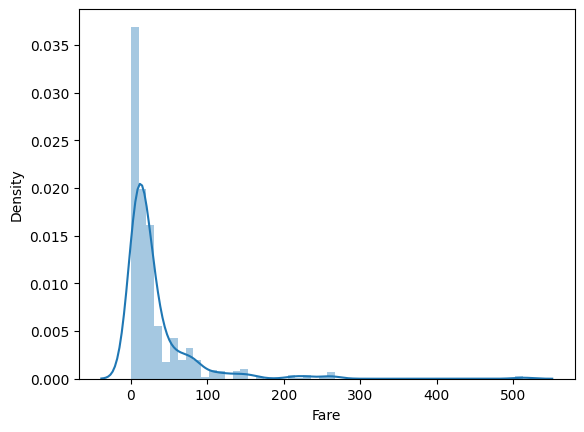

In [251]:
sns.distplot(titanic["Fare"])


# FE (Feature Engineering )


In [252]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [253]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [254]:
#here SibSp(sibling spouse) and Parch(parent child) both can be considered as a family also adding 1, as 1 represents the alive person
##here we create a new column "Family" i.e new feature by combining both SibSp and Parch creating a new feature i.e family

titanic['family'] = titanic['SibSp'] + titanic['Parch'] + 1

In [255]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,family
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


In [256]:
titanic.drop(columns= ["SibSp","Parch"], inplace = True)

In [257]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,male,22.0,7.2500,S,2
1,1,1,female,38.0,71.2833,C,2
2,1,3,female,26.0,7.9250,S,1
3,1,1,female,35.0,53.1000,S,2
4,0,3,male,35.0,8.0500,S,1


## checking unqiue values for all the columns

In [258]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'family'], dtype='object')

In [259]:
titanic["Survived"].unique()

array([0, 1])

In [260]:
Sex

NameError: name 'Sex' is not defined

In [ ]:
titanic["Sex"].unique() 

array(['male', 'female'], dtype=object)

In [ ]:
titanic["Age"].unique()  #here has more values as it is continuous

array([22.        , 38.        , 26.        , 35.        , 29.69911765,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [ ]:
titanic["Fare"].unique()  #here Fare has more values as it is continuous

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [ ]:
titanic["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
titanic["family"].unique()  #here family has less unique values 

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [ ]:
#here if the 1 then he’s  alone, if more than 1 and less than 5 medium family and if more than 5 and above then large family

def combine_age(number):
    if number == 1:
        return "Alone"
    elif number >1 and number <= 5:
        return "joint family"
    else:
        return "Large family"

In [ ]:
titanic['family'] = titanic['family'].apply(combine_age)

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,male,22.0,7.2500,S,joint family
1,1,1,female,38.0,71.2833,C,joint family
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,joint family
4,0,3,male,35.0,8.0500,S,Alone


In [ ]:
titanic['family'].unique()

array(['joint family', 'Alone', 'Large family'], dtype=object)

# Convertion of text data to numeric data


In [ ]:
dummees = pd.get_dummies(titanic, columns = ['Pclass', 'Sex', 'Embarked', 'family'], drop_first=True)  #here dummies will be working on categorical columns

In [ ]:
dummees.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_Large family,family_joint family
0,0,22.0,7.2500,False,True,True,False,True,False,True
1,1,38.0,71.2833,False,False,False,False,False,False,True
2,1,26.0,7.9250,False,True,False,False,True,False,False
3,1,35.0,53.1000,False,False,False,False,True,False,True
4,0,35.0,8.0500,False,True,True,False,True,False,False


In [ ]:
X = dummees.iloc[:, 1:]  #here rest all columns are independent
X

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_Large family,family_joint family
0,22.000000,7.2500,False,True,True,False,True,False,True
1,38.000000,71.2833,False,False,False,False,False,False,True
2,26.000000,7.9250,False,True,False,False,True,False,False
3,35.000000,53.1000,False,False,False,False,True,False,True
4,35.000000,8.0500,False,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,True,False,True,False,True,False,False
887,19.000000,30.0000,False,False,False,False,True,False,False
888,29.699118,23.4500,False,True,False,False,True,False,True
889,26.000000,30.0000,False,False,True,False,False,False,False


In [ ]:
y = dummees.iloc[:,:1]  #here survived column is dependent
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# Train - Test Split


In [ ]:
from sklearn.model_selection import train_test_split

#### X_train = input feature
#### y_train = output feature
#### X_test = input feature of test data
#### y_test = output feature of test data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [ ]:
X_train.head() #input feature

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_Large family,family_joint family
140,29.699118,15.2458,False,True,False,False,False,False,True
439,31.000000,10.5000,True,False,True,False,True,False,False
817,31.000000,37.0042,True,False,True,False,False,False,True
378,20.000000,4.0125,False,True,True,False,False,False,False
491,21.000000,7.2500,False,True,True,False,True,False,False


In [ ]:
y_train.head() #output feature


,Survived
140,0
439,0
817,0
378,0
491,0


In [ ]:
X_test.head() #input feature of test data


,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_Large family,family_joint family
495,29.699118,14.4583,False,True,True,False,False,False,False
648,29.699118,7.5500,False,True,True,False,True,False,False
278,7.000000,29.1250,False,True,True,True,False,True,False
31,29.699118,146.5208,False,False,False,False,False,False,True
255,29.000000,15.2458,False,True,False,False,False,False,True


In [ ]:
y_test.head() #output feature of test data


,Survived
495,0
648,0
278,0
31,1
255,1


In [ ]:
X_train.shape  #80% data for training

(712, 9)

In [ ]:
X_test.shape    #20% data for testing

(179, 9)

In [ ]:
print(X_train.shape) #input feature
print(y_train.shape)  #output feature

(712, 9)
(712, 1)


In [ ]:
print(X_test.shape)   #input feature of test data
print(y_test.shape)   #output feature of test data

(179, 9)
(179, 1)


# Machine Learning Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier  #using this model becoz it is a classification problem

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, y_train)   #1st the model has to be trained

/opt/anaconda3/envs/titanic/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [ ]:
pred = model.predict(X_test)  #pedicted value, here the model will be undergoing testing
pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1])

In [262]:
y_test   #actual value

,Survived
495,0
648,0
278,0
31,1
255,1
...,...
780,1
837,0
215,1
833,0


# model evaluation

In [272]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [279]:
def eval_metrics(y_test, pred):
    accuracy = accuracy_score(y_test, pred)
    conf_matrix = confusion_matrix(y_test, pred)
    class_report = classification_report(y_test, pred)
    return accuracy, conf_matrix, class_report

In [280]:
# Evaluate metrics
accuracy, conf_matrix, class_report = eval_metrics(y_test, pred)

In [281]:
# Print results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8547486033519553
Confusion Matrix:
[[101   9]
 [ 17  52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       110
           1       0.85      0.75      0.80        69

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



In [263]:
# from sklearn.metrics import accuracy_score

In [282]:
# accuracy_score(y_test, pred)  #here the accuracy is 85% which is a good model

# Moving the final model in pickle format

In [283]:
import pickle

In [284]:
pickle.dump(model, open('final_proj.pkl' , 'wb'))
